In [1]:
import csv
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pickle

Using TensorFlow backend.


In [2]:
DS = pd.read_csv("ObjectSubset150SentenceLength.csv")

In [3]:
DS['tag'].fillna('text', inplace=True)

In [327]:
words = list(set(DS["word"].values))
n_words = len(words)
tags = list(set(DS["tag"].values))
n_tags = len(tags)

In [107]:
Chars_DS = pd.DataFrame(columns=["text_ID","char","tag"])

In [277]:
len(sentences)

5998

In [328]:
for i in range(len(DS)):
    wordList =  list(DS["word"][i])
    for j in range(len(wordList)):
        Chars_DS = Chars_DS.append({'text_ID': DS["text_ID"][i] , 'char': wordList[j], 'tag': DS["tag"][i]},ignore_index=True)
        

In [123]:
Chars_DS.to_csv("CharsDS.csv",index=False)

In [279]:
Chars_DS = pd.read_csv("CharsDSDULL.csv")

In [280]:
Chars_DS.head()

text_ID char     tag
0    46809    R  object
1    46809    R  object
2    46809    1  object
3    46809    3  object
4    46809    0  object

In [282]:
class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["char"].values.tolist(),
                                                           s["tag"].values.tolist())]
        self.grouped = self.data.groupby("text_ID").apply(agg_func)
        self.sentences = [s for s in self.grouped]

In [283]:
getter = SentenceGetter(Chars_DS)

In [284]:
sentences = getter.sentences

In [285]:
sentences[53]

[('K', 'text'),
 ('a', 'text'),
 ('r', 'text'),
 ('d', 'text'),
 ('i', 'text'),
 ('o', 'text'),
 ('v', 'text'),
 ('a', 'text'),
 ('s', 'text'),
 ('k', 'text'),
 ('u', 'text'),
 ('l', 'text'),
 ('a', 'text'),
 ('a', 'text'),
 ('r', 'text'),
 ('s', 'text'),
 ('ü', 'text'),
 ('s', 'text'),
 ('t', 'text'),
 ('e', 'text'),
 ('e', 'text'),
 ('m', 'text'),
 (':', 'text'),
 ('F', 'text'),
 ('r', 'text'),
 ('.', 'text'),
 ('r', 'text'),
 ('e', 'text'),
 ('g', 'text'),
 ('u', 'text'),
 ('l', 'text'),
 ('a', 'text'),
 ('a', 'text'),
 ('r', 'text'),
 ('n', 'text'),
 ('e', 'text'),
 ('8', 'text'),
 ('0', 'text'),
 ('x', 'text'),
 ('m', 'text'),
 ('i', 'text'),
 ('n', 'text'),
 (',', 'text'),
 ('R', 'object'),
 ('R', 'object'),
 ('1', 'object'),
 ('4', 'object'),
 ('0', 'object'),
 ('/', 'object'),
 ('9', 'object'),
 ('0', 'object')]

In [286]:
max_len = 150
max_len_char = 10

In [287]:
tag2idx = {t: i + 1 for i, t in enumerate(tags)}
tag2idx["PAD"] = 0
idx2tag = {i: w for w, i in tag2idx.items()}

In [288]:
tag2idx

{'object': 1, 'text': 2, 'PAD': 0}

In [289]:
chars = set([w_i for w in words for w_i in w])
n_chars = len(chars)
print(n_chars)


104


In [290]:
char2idx = {c: i + 2 for i, c in enumerate(chars)}
char2idx["UNK"] = 1 #For predictions
char2idx["PAD"] = 0

In [291]:
idx2char = {i: w for w, i in char2idx.items()}

In [292]:
# X_char = []
# for sentence in sentences:
#     sent_seq = []
#     for i in range(max_len):
#         word_seq = []
#         for j in range(max_len_char):
#             try:
#                 word_seq.append(char2idx.get(sentence[i][0][j]))
#             except:
#                 word_seq.append(char2idx.get("PAD"))
#         sent_seq.append(word_seq)
#     X_char.append(np.array(sent_seq))

from keras.preprocessing.sequence import pad_sequences
X_char = [[char2idx[w[0]] for w in s] for s in sentences]
X_char = pad_sequences(maxlen=max_len, sequences=X_char, value=char2idx["PAD"], padding='post', truncating='post')

In [293]:
y = [[tag2idx[w[1]] for w  in s] for s in sentences]


In [294]:
len(sentences)

13643

In [295]:
y = pad_sequences(maxlen=max_len, sequences=y, value=tag2idx["PAD"], padding='post', truncating='post')

In [296]:
X_char[1].shape

(150,)

In [377]:
X_char[1]

array([82, 56, 73, 56,  8, 90, 56, 13, 59, 55, 22, 93, 88, 24,  2, 88, 44,
        8, 52,  8,  8, 24, 23, 56, 88, 93, 13, 24, 90, 16, 24, 56, 28, 73,
       69,  8,  2, 88, 93, 59, 88, 56, 13, 59, 25, 70, 70,  2, 93, 22, 93,
       88, 24,  2, 88, 56, 73, 20, 20,  5,  5, 41, 72, 14, 70,  2,  2, 67,
       31, 73, 76, 31, 88, 24, 28, 41, 41, 73,  5, 70, 73, 70, 75, 73,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [297]:
tag2idx

{'object': 1, 'text': 2, 'PAD': 0}

In [298]:
from sklearn.model_selection import train_test_split
X_char_tr, X_char_te, y_tr,  y_te= train_test_split(X_char, y, test_size=0.2, random_state=2018)


In [299]:
char2idx

{'m': 2,
 'N': 3,
 ':': 4,
 '1': 5,
 '[': 6,
 'Ü': 7,
 'e': 8,
 'W': 9,
 'z': 10,
 '´': 11,
 ')': 12,
 'u': 13,
 '6': 14,
 'Ä': 15,
 'ä': 16,
 'n': 17,
 '#': 18,
 'U': 19,
 'R': 20,
 'Z': 21,
 'p': 22,
 ',': 23,
 's': 24,
 '7': 25,
 '&': 26,
 '�': 27,
 'i': 28,
 'j': 29,
 'q': 30,
 'g': 31,
 '`': 32,
 'A': 33,
 'L': 34,
 'S': 35,
 'ž': 36,
 'y': 37,
 'F': 38,
 '½': 39,
 '%': 40,
 '2': 41,
 'G': 42,
 ']': 43,
 'f': 44,
 'x': 45,
 'M': 46,
 'Ö': 47,
 '<': 48,
 '4': 49,
 'ˇ': 50,
 '*': 51,
 'r': 52,
 ';': 53,
 '\\': 54,
 '3': 55,
 't': 56,
 "'": 57,
 'k': 58,
 'd': 59,
 'Õ': 60,
 '?': 61,
 'Q': 62,
 'w': 63,
 'B': 64,
 '"': 65,
 'b': 66,
 'H': 67,
 '5': 68,
 'E': 69,
 '0': 70,
 'K': 71,
 '/': 72,
 '.': 73,
 'ü': 74,
 '9': 75,
 'T': 76,
 '+': 77,
 '–': 78,
 'D': 79,
 'X': 80,
 '(': 81,
 'P': 82,
 '>': 83,
 'O': 84,
 '!': 85,
 'V': 86,
 '°': 87,
 'a': 88,
 'ö': 89,
 'h': 90,
 '8': 91,
 'C': 92,
 'l': 93,
 'Y': 94,
 'J': 95,
 'v': 96,
 '_': 97,
 'c': 98,
 'I': 99,
 '~': 100,
 '=': 101,
 'š':

In [300]:
X_char[2]

array([  5,  25,  73,   5,  41,  73,  41,  70,   5,  70, 104,  71,  88,
         8,  66,  13,  24,  56,   8,  56,  88,  73,  20,  20,   5,  70,
        70,  72,  25,  70,  23,   5,  70,  70,  72,  14,  70,  73,  82,
         8,  88,  52,  28,  17,  31,  93,  13,  24,  22, 103,  93,   8,
        58, 103,  52,  59,  13,  17,  13,  59,  73,  84,  56,  24,  13,
        24,  56,  88,  56,  13,  59,  88,  24,   8,  56,  88,  59,  88,
         8,   2,  88,  58,  88,  58,  88,   8,  93,  88,  93,   8,  56,
        13,  31,  28, 105,   2,  66,  93,  13,  24,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0])

In [301]:
y[1]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [302]:
n_tags

2

In [333]:
max_len

150

In [357]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Conv1D
from keras.layers import Bidirectional, concatenate, SpatialDropout1D, GlobalMaxPooling1D


# input and embeddings for characters
char_in = Input(shape=(max_len,))

emb_char = Embedding(input_dim=n_chars + 2, output_dim=20,
                           input_length=max_len)(char_in)
# character LSTM to get word encodings by characters
# WE use TimeDistributed to apply LSTM to each of the timesteps, independently:
# The trick here is, to wrap the parts that should be applied to the characters in a TimeDistributed layer to apply the same layers to every character sequence.



# char_enc = TimeDistributed(LSTM(units=20, return_sequences=False,
#                                 recurrent_dropout=0.5))(emb_char)

x = SpatialDropout1D(0.3)(emb_char)

# main LSTM
main_lstm = Bidirectional(LSTM(units=20, return_sequences=True,
                               recurrent_dropout=0.5))(x)
# Time Distributed Dense applies the same dense layer to every time step during GRU/LSTM Cell unrolling.
#Using return_sequences=False, the Dense layer will get applied only once in the last cell. This is normally the case when RNNs are used for classification problems. 
#If return_sequences=True, then the Dense layer is used to apply at every timestep just like TimeDistributedDense.


out = TimeDistributed(Dense(n_tags + 1, activation="softmax"))(main_lstm)
a
model = Model( char_in, out)
 




In [358]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
model.summary()


Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        (None, 150)               0         
_________________________________________________________________
embedding_26 (Embedding)     (None, 150, 20)           2120      
_________________________________________________________________
spatial_dropout1d_15 (Spatia (None, 150, 20)           0         
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 150, 40)           6560      
_________________________________________________________________
time_distributed_33 (TimeDis (None, 150, 3)            123       
Total params: 8,803
Trainable params: 8,803
Non-trainable params: 0
_________________________________________________________________


In [359]:
a = np.array(X_char_tr).reshape((len(X_char_tr), max_len,))

In [307]:
a.shape

(10914, 150)

In [308]:
X_char_tr[1].shape

(150,)

In [360]:
from keras.callbacks import ModelCheckpoint

# Saving the best model only
filepath="CharEmbcharsOnly-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Fit the best model
history = model.fit(np.array(X_char_tr).reshape((len(X_char_tr), max_len,)),
                    np.array(y_tr).reshape(len(y_tr), max_len, 1),
                    batch_size=32, epochs=10, validation_split=0.1, verbose=1,callbacks=callbacks_list)


C:\Users\Kasutaja\Anaconda3\envs\myEnv\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 9822 samples, validate on 1092 samples
Epoch 1/10
9822/9822 [==============================] - 37s 4ms/step - loss: 0.2369 - acc: 0.9444 - val_loss: 0.0676 - val_acc: 0.9822

Epoch 00001: val_acc improved from -inf to 0.98220, saving model to CharEmbcharsOnly-0.98.hdf5
Epoch 2/10
9822/9822 [==============================] - 36s 4ms/step - loss: 0.0617 - acc: 0.9817 - val_loss: 0.0499 - val_acc: 0.9836

Epoch 00002: val_acc improved from 0.98220 to 0.98359, saving model to CharEmbcharsOnly-0.98.hdf5
Epoch 3/10
9822/9822 [==============================] - 36s 4ms/step - loss: 0.0509 - acc: 0.9839 - val_loss: 0.0447 - val_acc: 0.9854

Epoch 00003: val_acc improved from 0.98359 to 0.98541, saving model to CharEmbcharsOnly-0.99.hdf5
Epoch 4/10
9822/9822 [==============================] - 37s 4ms/step - loss: 0.0460 - acc: 0.9854 - val_loss: 0.0424 - val_acc: 0.9863

Epoch 00004: val_acc improved from 0.98541 to 0.98627, saving model to CharEmbcharsOnly-0.99.hdf5
Epoch 5/10
9822/982

In [361]:
hist = pd.DataFrame(history.history)


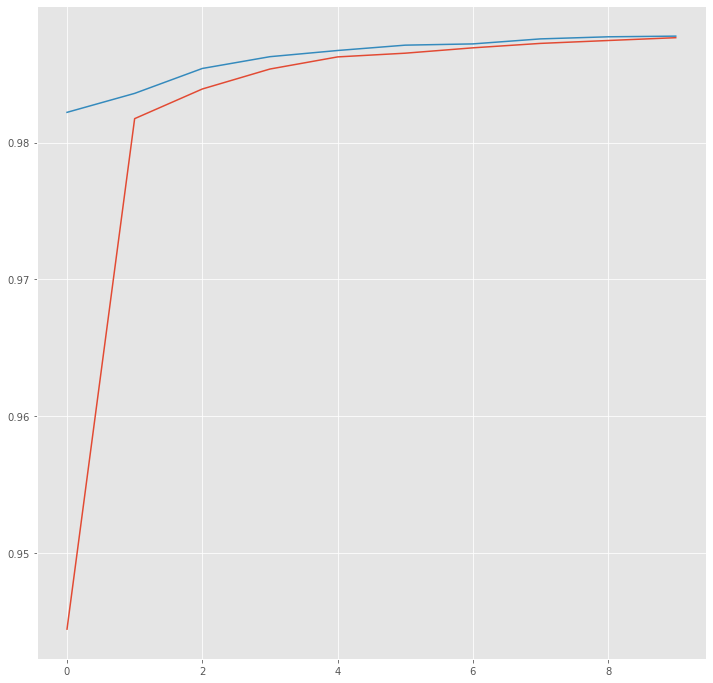

In [362]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure(figsize=(12,12))
plt.plot(hist["acc"])
plt.plot(hist["val_acc"])
plt.show()


In [363]:
y_pred = model.predict(
                        np.array(X_char_te).reshape((len(X_char_te),
                                                     max_len,)))


In [364]:
y_pred[1]

array([[3.77256772e-04, 7.91146457e-02, 9.20508146e-01],
       [5.92785727e-05, 3.60443480e-02, 9.63896394e-01],
       [6.29910646e-05, 2.95197479e-02, 9.70417261e-01],
       [1.40639886e-05, 1.26113333e-02, 9.87374604e-01],
       [1.16349574e-05, 1.07074790e-02, 9.89280879e-01],
       [2.62142585e-05, 1.68446936e-02, 9.83129084e-01],
       [1.32614023e-05, 9.29209869e-03, 9.90694642e-01],
       [1.56589667e-05, 1.18490094e-02, 9.88135338e-01],
       [1.16524498e-05, 1.30639169e-02, 9.86924410e-01],
       [1.74054567e-05, 1.73209570e-02, 9.82661664e-01],
       [1.33079366e-05, 2.59312354e-02, 9.74055409e-01],
       [2.14407501e-05, 2.67381407e-02, 9.73240376e-01],
       [2.22152430e-05, 2.88447682e-02, 9.71132994e-01],
       [3.76651369e-05, 3.54376137e-02, 9.64524686e-01],
       [1.75637670e-05, 3.49032357e-02, 9.65079188e-01],
       [3.61285129e-05, 3.58584039e-02, 9.64105427e-01],
       [3.10868709e-05, 2.92870440e-02, 9.70681846e-01],
       [1.45089243e-05, 1.94651

In [365]:
X_char_te[1020]

array([  5,  25,  73,  70,   5,  73,  41,  70,   5,  41, 104,  71, 103,
        22,  24,  13,  59,   8,  88,  13,  24,  58,  13,  93,  56,  88,
        56,  24,  28, 103, 103,  17,  28,  93,  66,  28,  93,  73,  58,
        88,  52,   8,  17,   8,  17,  13,  59,  90,  72,  58,  73,  20,
        20,   5,  14,  70,  72,   5,  70,  70,   2,   2,  67,  31,  73,
        35,  22,  84,  41,  75,   5, 104,  75,  41,  40,  23,  44,  52,
        73,  91,  70,  45,  72,   2,  28,  17,  73,  73,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0])

In [366]:
def charindx2word(Tword):
    word = []
    for i in range(len(Tword)):
        if(Tword[i] !=0):
            word.append(idx2char[Tword[i]])
    return "".join(word)

In [367]:
i = 1050
p = np.argmax(y_pred[i], axis=-1)
print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
print(30 * "=")
for w, t, pred in zip(X_char_te[i], y_te[i], p):
    if t != 0: #PAD
        print("{:15}: {:5} {}".format(idx2char[w], idx2tag[t], idx2tag[pred]))


Word           ||True ||Pred
H              : text  text
i              : text  text
n              : text  text
g              : text  text
a              : text  text
m              : text  text
i              : text  text
s              : text  text
s              : text  text
ü              : text  text
s              : text  text
t              : text  text
e              : text  text
e              : text  text
m              : text  text
:              : text  text
K              : text  text
o              : text  text
p              : text  text
s              : text  text
u              : text  text
d              : text  text
e              : text  text
s              : text  text
v              : text  text
e              : text  text
s              : text  text
i              : text  text
k              : text  text
u              : text  text
l              : text  text
a              : text  text
a              : text  text
r              : text  text
n              : te

In [368]:
len(y_pred)

2729

### Wrong Tags


In [369]:
j = 0
print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
print(30 * "=")

for i in range(len(y_pred)):
    p = np.argmax(y_pred[i], axis=-1)
    for w, t, pred in zip(X_char_te[i], y_te[i], p):
        if idx2char[w] != "": #PAD
            if idx2tag[t] != idx2tag[pred]:
                print("{:15}: {:5} {}".format(idx2char[w], idx2tag[t], idx2tag[pred]))
                j = j+1


Word           ||True ||Pred
4              : object text
3              : object text
,              : object text
m              : object text
m              : object text
H              : object text
g              : object text
.              : object text
m              : object text
m              : object text
H              : object text
g              : object text
.              : object text
p              : object text
u              : object text
h              : object text
t              : object text
a              : object text
d              : object text
.              : object text
m              : text  object
m              : text  object
H              : text  object
g              : text  object
m              : text  object
m              : text  object
H              : text  object
g              : text  object
m              : text  object
m              : text  object
H              : text  object
g              : text  object
,              : text  object
/

h              : object text
g              : object text
m              : text  object
m              : text  object
P              : object text
7              : object text
c              : object text
m              : object text
m              : text  object
m              : text  object
/              : text  object
m              : text  object
H              : text  object
g              : text  object
t              : object text
a              : object text
r              : object text
v              : object text
i              : object text
t              : object text
a              : object text
n              : object text
u              : object text
d              : object text
.              : object text
m              : text  object
g              : text  object
m              : text  object
m              : object text
i              : object text
n              : object text
.              : object text
9              : text  object
0              : text  object
R

m              : text  object
H              : text  object
g              : text  object
m              : object text
.              : object text
m              : object text
m              : object text
i              : object text
n              : object text
,              : object text
/              : text  object
9              : text  object
0              : text  object
1              : text  object
5              : text  object
5              : text  object
/              : text  object
8              : text  object
0              : text  object
m              : object text
H              : object text
1              : object text
1              : object text
4              : object text
/              : object text
7              : object text
3              : object text
r              : object text
e              : object text
g              : object text
u              : object text
l              : object text
a              : object text
a              : object text
r 

7              : text  object
8              : text  object
0              : text  object
m              : object text
m              : object text
H              : object text
g              : object text
.              : object text
9              : text  object
0              : text  object
m              : text  object
m              : object text
,              : object text
8              : object text
0              : object text
m              : text  object
m              : text  object
g              : text  object
m              : object text
H              : object text
g              : object text
.              : object text
.              : object text
6              : text  object
9              : text  object
m              : text  object
m              : text  object
H              : text  object
g              : text  object
,              : text  object
9              : text  object
0              : text  object
k              : text  object
k              : text  o

m              : text  object
g              : text  object
k              : text  object
o              : text  object
8              : text  object
0              : text  object
m              : text  object
H              : text  object
g              : text  object
0              : text  object
:              : text  object
8              : text  object
5              : text  object
.              : object text
V              : object text
e              : object text
s              : object text
t              : object text
l              : object text
u              : object text
s              : object text
,              : object text
1              : text  object
8              : text  object
6              : text  object
R              : text  object
2              : object text
.              : object text
3              : object text
.              : object text
7              : text  object
8              : text  object
s              : text  object
,              : text  

m              : object text
6              : text  object
0              : text  object
m              : object text
m              : object text
H              : object text
G              : object text
.              : object text
S              : object text
ü              : object text
d              : object text
a              : object text
m              : object text
e              : object text
t              : object text
e              : object text
g              : object text
e              : object text
v              : object text
u              : object text
s              : object text
m              : text  object
g              : text  object
m              : object text
h              : object text
g              : object text
r              : object text
e              : object text
g              : object text
.              : object text
p              : object text
u              : object text
h              : object text
t              : object text
a         

0              : object text
.              : object text
2              : object text
0              : object text
1              : object text
5              : object text
.              : object text
m              : text  object
m              : text  object
H              : text  object
g              : text  object
0              : object text
5              : object text
.              : object text
1              : object text
1              : object text
.              : object text
2              : object text
0              : object text
1              : object text
5              : object text
.              : object text
m              : text  object
m              : text  object
H              : text  object
g              : text  object
2              : object text
6              : object text
.              : object text
1              : object text
0              : object text
.              : object text
2              : object text
0              : object text
1     

r              : object text
r              : object text
1              : object text
4              : object text
0              : object text
/              : object text
9              : object text
0              : object text
8              : text  object
0              : text  object
H              : text  object
o              : text  object
m              : text  object
m              : object text
m              : object text
H              : object text
g              : object text
m              : text  object
m              : text  object
/              : text  object
1              : text  object
0              : text  object
0              : text  object
.              : text  object
R              : object text
m              : text  object
m              : text  object
m              : text  object
/              : text  object
R              : text  object
R              : text  object
m              : object text
g              : text  object
8              : text  o

In [370]:
j

4886

In [371]:
i = 2
p = np.argmax(y_pred[i], axis=-1)
print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
print(30 * "=")
for w, t, pred in zip(X_char_te[i], y_te[i], p):
    if t != 0: #PAD
        print("{:15}: {:5} {}".format(idx2char[w], idx2tag[t], idx2tag[pred]))


Word           ||True ||Pred
K              : text  text
a              : text  text
r              : text  text
d              : text  text
i              : text  text
o              : text  text
v              : text  text
a              : text  text
s              : text  text
k              : text  text
u              : text  text
l              : text  text
a              : text  text
a              : text  text
r              : text  text
s              : text  text
ü              : text  text
s              : text  text
t              : text  text
e              : text  text
e              : text  text
m              : text  text
:              : text  text
R              : object object
R              : object object
1              : object object
0              : object object
5              : object object
/              : object object
7              : object object
0              : object object
m              : text  text
m              : text  text
H              : text  

In [372]:
from seqeval.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i].replace("PAD", "text"))
        out.append(out_i)
    return out

def test2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            out_i.append(idx2tag[p].replace("PAD", "text"))
        out.append(out_i)
    return out

pred_labels = pred2label(y_pred)
test_labels = test2label(y_te)

print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))
print(classification_report(test_labels, pred_labels))


F1-score: 59.9%
           precision    recall  f1-score   support

     text       0.68      0.72      0.70      4379
   object       0.37      0.41      0.39      2028

micro avg       0.58      0.62      0.60      6407
macro avg       0.58      0.62      0.60      6407



In [373]:
accuracy_score(test_labels, pred_labels)

0.9880762183950165

In [374]:
from sklearn_crfsuite.metrics import flat_classification_report,flat_accuracy_score
report = flat_classification_report(y_pred=pred_labels, y_true=test_labels)
print(report)
print("Accuracy",flat_accuracy_score(y_pred=pred_labels, y_true=test_labels))

              precision    recall  f1-score   support

      object       0.92      0.83      0.87     19784
        text       0.99      1.00      0.99    389566

    accuracy                           0.99    409350
   macro avg       0.95      0.91      0.93    409350
weighted avg       0.99      0.99      0.99    409350

Accuracy 0.9880762183950165


In [375]:
np.array(y_predNew[1]).shape

(150,)

In [376]:
from sklearn_crfsuite.metrics import flat_f1_score, flat_precision_score, flat_recall_score
def pred2label2(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(p_i)
        out.append(out_i)
    return out
y_predNew = pred2label2(y_pred)
print(flat_recall_score(y_pred=np.array(y_predNew) , y_true= y_te ,average = "weighted"))
print(flat_f1_score(y_pred=np.array(y_predNew),  y_true= y_te ,average = "weighted"))
print(flat_precision_score(y_pred=np.array(y_predNew), y_true= y_te ,average = "weighted"))


0.9880640039086357
0.9877867723679771
0.987773868522945
